In [1]:
import env
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import wrangle

In [3]:
df=wrangle.wrangle()

Reading data from SQL server....
(This usually takes a while...)
Data read.
Adding number of programs completed...
Converting datatypes and reindexing on datetime....
Adding columns for days after graduation and program name.
Data is acquired, prepared, and wrangling complete.


In [4]:
df.to_csv('initial_pull.csv')

In [3]:
df.head()

,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time,days_after_grad,program
date_time,,,,,,,,,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:55:03,720 days,php_web_dev
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:02,720 days,php_web_dev
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:05,720 days,php_web_dev
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:06,720 days,php_web_dev
2018-01-26 10:40:15,2018-01-26,10:40:15,javascript-i/functions,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 10:40:15,720 days,php_web_dev


In [11]:
df[df.program_id==1].cohort_name.value_counts()

Lassen        9587
Arches        8890
Olympic       4954
Kings         2845
Hampton       1712
Quincy        1237
Glacier        598
Joshua         302
Ike            253
Badlands        93
Franklin        72
Denali           4
Everglades       1
Name: cohort_name, dtype: int64

In [12]:
df[df.program_id==2].cohort_name.value_counts()

Staff         84031
Ceres         40730
Zion          38096
Jupiter       37109
Fortuna       36902
Voyageurs     35636
Ganymede      33844
Apex          33568
Deimos        32888
Teddy         30926
Hyperion      29855
Betelgeuse    29356
Ulysses       28534
Europa        28033
Xanadu        27749
Wrangell      25586
Andromeda     25359
Kalypso       23691
Yosemite      20743
Bash          17713
Luna          16623
Marco         16397
Sequoia        7444
Neptune        7276
Pinnacles      2158
Oberon         1672
Niagara         755
Mammoth         691
Name: cohort_name, dtype: int64

In [17]:
df[df.program_id==3].cohort_name.value_counts()

Darden      32015
Bayes       26538
Curie       21582
Easley      14715
Florence     8562
Name: cohort_name, dtype: int64

### Lets look at individual student access per DS Cohort

- Go ahead and make a dataframe for each

In [24]:
df.head()

,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time,days_after_grad,program
date_time,,,,,,,,,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:55:03,720 days,php_web_dev
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:02,720 days,php_web_dev
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:05,720 days,php_web_dev
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:06,720 days,php_web_dev
2018-01-26 10:40:15,2018-01-26,10:40:15,javascript-i/functions,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 10:40:15,720 days,php_web_dev


In [25]:
df[df.cohort_name ==' Bayes']

,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time,days_after_grad,program
date_time,,,,,,,,,,,,,,


In [26]:
bayes = df[df.cohort_name =='Bayes']
curie = df[df.cohort_name =='Curie']
darden = df[df.cohort_name =='Darden']
easley = df[df.cohort_name =='Easley']
florence = df[df.cohort_name =='Florence']


In [33]:
print(bayes.shape)
print(curie.shape)
print(darden.shape)
print(easley.shape)
print(florence.shape)

(26538, 14)
(21582, 14)
(32015, 14)
(14715, 14)
(8562, 14)


In [34]:
# Get cohort counts
print(len(bayes.user_id.unique()))
print(len(curie.user_id.unique()))
print(len(darden.user_id.unique()))
print(len(easley.user_id.unique()))
print(len(florence.user_id.unique()))

23
21
29
17
21


### Lets look at Bayes traffic by user

In [35]:
df.head()

,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time,days_after_grad,program
date_time,,,,,,,,,,,,,,
2018-01-26 09:55:03,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:55:03,720 days,php_web_dev
2018-01-26 09:56:02,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:02,720 days,php_web_dev
2018-01-26 09:56:05,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:05,720 days,php_web_dev
2018-01-26 09:56:06,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 09:56:06,720 days,php_web_dev
2018-01-26 10:40:15,2018-01-26,10:40:15,javascript-i/functions,1,8.0,97.105.19.61,Hampton,2015-09-22,2016-02-06,1,2,2018-01-26 10:40:15,720 days,php_web_dev


In [40]:
bayes.head()

,date,time,endpoint,user_id,cohort_id_x,source_ip,cohort_name,cohort_start,cohort_end,program_id,number_of_classes,date_time,days_after_grad,program
date_time,,,,,,,,,,,,,,
2019-08-20 09:39:58,2019-08-20,09:39:58,/,466,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3,1,2019-08-20 09:39:58,-163 days,data_science
2019-08-20 10:50:06,2019-08-20,10:50:06,1-fundamentals/1.1-intro-to-data-science,466,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3,1,2019-08-20 10:50:06,-163 days,data_science
2019-08-20 10:50:06,2019-08-20,10:50:06,1-fundamentals/modern-data-scientist.jpg,466,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3,1,2019-08-20 10:50:06,-163 days,data_science
2019-08-20 10:50:06,2019-08-20,10:50:06,1-fundamentals/AI-ML-DL-timeline.jpg,466,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3,1,2019-08-20 10:50:06,-163 days,data_science
2019-08-20 14:39:07,2019-08-20,14:39:07,/,466,34.0,97.105.19.58,Bayes,2019-08-19,2020-01-30,3,1,2019-08-20 14:39:07,-163 days,data_science


<AxesSubplot:xlabel='date_time'>

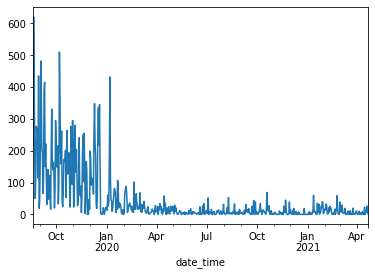

In [39]:
bayes['endpoint'].resample('d').count().plot()


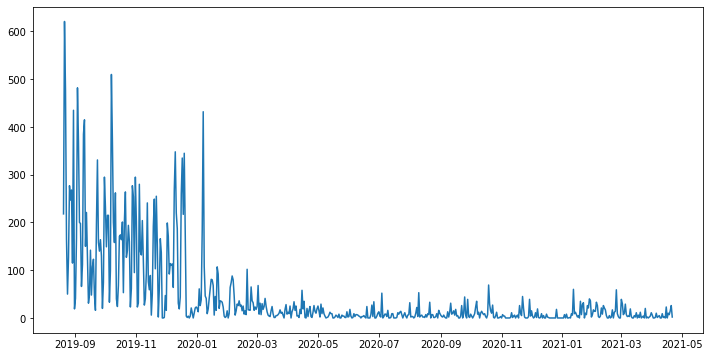

In [44]:
fig, ax =plt.subplots(figsize=(12,6))

x = bayes.date
y = bayes['endpoint'].resample('d').count()

ax.plot(y)

plt.show()

In [ ]:

ax.set_xlim(data['Dates'].min(), data['Dates'].max())


In [38]:
bayes_pages

date_time
2019-08-20    218
2019-08-21    621
2019-08-22    476
2019-08-23    165
2019-08-24     50
             ... 
2021-04-17     10
2021-04-18      7
2021-04-19     15
2021-04-20     26
2021-04-21      2
Freq: D, Name: endpoint, Length: 611, dtype: int64

In [ ]:
sns.lineplot(x='date' y='endpoint')

In [14]:
df[df.program_id==4].cohort_name.value_counts()

Apollo    5
Name: cohort_name, dtype: int64

In [15]:
df.program_id.value_counts()

2    713365
3    103412
1     30548
4         5
Name: program_id, dtype: int64

In [16]:
df.endpoint.value_counts()

/                                                 45854
javascript-i                                      18203
toc                                               17591
search/search_index.json                          17534
java-iii                                          13166
                                                  ...  
5-stats                                               1
java-ii/file-op                                       1
html-css/img/favicon.ico                              1
content/examples/constructors-destructors.html        1
where                                                 1
Name: endpoint, Length: 2224, dtype: int64